<a href="https://colab.research.google.com/github/Aashvi123/Pythonassignments/blob/main/Python_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Load the dataset into a DataFrame, skipping the first 10 rows
df = pd.read_csv('weather_1819.csv', skiprows=11)

# Describe the data
data_description = df.describe()

# Check for unique years in the dataset
unique_years = df['year'].unique()

# Calculate the temporal resolution
temporal_resolution = df['day'].nunique()

# List of weather measurements reported
weather_measurements = df.columns[4:]

# Print the results
print("Data Description:")
print(data_description)
print("\nNumber of Years of Recordings:", len(unique_years))
print("Temporal Resolution (Number of Days in the Dataset):", temporal_resolution)
print("Weather Measurements Reported:", weather_measurements)



Data Description:
               day         year        maxtp        mintp         rain  \
count  2920.000000  2920.000000  2902.000000  2902.000000  2897.000000   
mean     15.720548  2018.500000    13.283150     6.432977     3.063583   
std       8.797754     0.500086     5.146289     4.368755     5.053881   
min       1.000000  2018.000000    -1.800000    -7.000000     0.000000   
25%       8.000000  2018.000000     9.500000     3.100000     0.000000   
50%      16.000000  2018.500000    12.800000     6.400000     0.700000   
75%      23.000000  2019.000000    17.100000     9.600000     4.000000   
max      31.000000  2019.000000    32.000000    18.900000    54.600000   

              wdsp           hg          sun  
count  2915.000000  2904.000000  2913.000000  
mean      9.481475    25.443871     3.783797  
std       3.820605     9.278313     3.850012  
min       2.300000     7.000000     0.000000  
25%       6.500000    19.000000     0.300000  
50%       8.900000    24.000000  

***Question 2:*** Determine how many missing values there are in each column of the dataset. Can you think
of a reason why these values are missing? Discuss different strategies for filling the missing
values, highlighting the advantages and disadvantages of each strategy, in the context of this
dataset.

In [5]:
# Count missing values in each column
missing_values = df.isna().sum()

# Print the number of missing values in each column
print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
day         0
month       0
year        0
station     0
maxtp      18
mintp      18
rain       23
wdsp        5
hg         16
sun         7
dtype: int64


As for the reasons why these values are missing, there can be several factors contributing to missing data in a weather dataset:

**Data Collection Issues:** Weather stations may experience data collection problems due to technical issues, sensor failures, or human errors. This can lead to missing values for various parameters.

**Temporal Gaps:** Sometimes, certain weather parameters may not be recorded at specific times, resulting in gaps in the data. For example, sunshine duration data may be missing on cloudy or rainy days.

**Station Relocation:** If the weather station is relocated or undergoes changes, there might be missing data during the transition period.

**Data Transmission Issues:** Data transmission errors can result in missing values as well.

Regarding strategies for filling missing values in the context of this dataset, here are some common approaches:

Forward Fill or Backward Fill: You can use the previous day's value (backward fill) or the next day's value (forward fill) to fill missing values. This method is suitable for parameters that don't change abruptly from day to day.

Interpolation: Interpolation methods, such as linear or cubic interpolation, can be used to estimate missing values based on the trend in the data. It works well when the data has a clear pattern.

Mean, Median, or Mode Imputation: Replacing missing values with the mean, median, or mode of the column can be a simple way to fill gaps. This method is suitable for parameters with relatively stable and symmetric distributions.

Seasonal Decomposition: For time series data, you can use seasonal decomposition to identify and fill missing values based on seasonal patterns.

Machine Learning Models: More advanced techniques involve using machine learning models to predict missing values based on the relationships between different weather parameters and historical data.

Advantages and disadvantages of these strategies:

Forward Fill/Backward Fill:

Advantages: Simple and quick. Works well for data with gradual changes.
Disadvantages: Inaccurate for data with abrupt changes.
Interpolation:

Advantages: Captures trends in the data, works well for continuous variables.
Disadvantages: Sensitive to outliers, may not be suitable for non-linear data.
Mean/Median/Mode Imputation:

Advantages: Easy to implement, maintains data distribution.
Disadvantages: Ignores temporal trends, can introduce bias.
Seasonal Decomposition:

Advantages: Captures seasonal patterns, effective for time series data.
Disadvantages: Requires knowledge of the data's seasonality.
Machine Learning Models:

Advantages: Can capture complex relationships, adapt to different data patterns.
Disadvantages: Requires more effort and expertise, may overfit the data.


**Question3:** Write code to answer the following questions: (15 marks)
1. At what station and on what date was the highest wind speed recorded?
2. At what station and on what date was the highest maximum air temperature recorded?
3. At what station and on what date was the largest amount of rain recorded?

In [6]:
# Find the row with the highest wind speed
max_wind_speed_row = df[df['wdsp'] == df['wdsp'].max()]

# Extract the station and date
station_highest_wind_speed = max_wind_speed_row['station'].values[0]
date_highest_wind_speed = f"{max_wind_speed_row['day'].values[0]} {max_wind_speed_row['month'].values[0]} {max_wind_speed_row['year'].values[0]}"

print(f"Highest Wind Speed: {station_highest_wind_speed} on {date_highest_wind_speed}")


Highest Wind Speed: Dublin Airport on 2 mar 2018


In [7]:
# Find the row with the highest maximum air temperature
max_temp_row = df[df['maxtp'] == df['maxtp'].max()]

# Extract the station and date
station_highest_max_temp = max_temp_row['station'].values[0]
date_highest_max_temp = f"{max_temp_row['day'].values[0]} {max_temp_row['month'].values[0]} {max_temp_row['year'].values[0]}"

print(f"Highest Maximum Air Temperature: {station_highest_max_temp} on {date_highest_max_temp}")


Highest Maximum Air Temperature: Shannon Airport on 28 jun 2018


In [8]:
# Find the row with the largest amount of rain
max_rain_row = df[df['rain'] == df['rain'].max()]

# Extract the station and date
station_largest_rain = max_rain_row['station'].values[0]
date_largest_rain = f"{max_rain_row['day'].values[0]} {max_rain_row['month'].values[0]} {max_rain_row['year'].values[0]}"

print(f"Largest Amount of Rain: {station_largest_rain} on {date_largest_rain}")


Largest Amount of Rain: Cork Airport on 15 apr 2019


**Question 4:** Create a numerical summary (mean, standard deviation, minimum, maximum, etc.) for each
of the weather measurements. Discuss and interpret your results.

In [9]:
# Generate a numerical summary for each weather measurement
summary_statistics = df.describe()

# Print the summary statistics
print("Numerical Summary for Weather Measurements:")
print(summary_statistics)


Numerical Summary for Weather Measurements:
               day         year        maxtp        mintp         rain  \
count  2920.000000  2920.000000  2902.000000  2902.000000  2897.000000   
mean     15.720548  2018.500000    13.283150     6.432977     3.063583   
std       8.797754     0.500086     5.146289     4.368755     5.053881   
min       1.000000  2018.000000    -1.800000    -7.000000     0.000000   
25%       8.000000  2018.000000     9.500000     3.100000     0.000000   
50%      16.000000  2018.500000    12.800000     6.400000     0.700000   
75%      23.000000  2019.000000    17.100000     9.600000     4.000000   
max      31.000000  2019.000000    32.000000    18.900000    54.600000   

              wdsp           hg          sun  
count  2915.000000  2904.000000  2913.000000  
mean      9.481475    25.443871     3.783797  
std       3.820605     9.278313     3.850012  
min       2.300000     7.000000     0.000000  
25%       6.500000    19.000000     0.300000  
50%    

Question 5: Create a graphical summary for each of the weather measurements. Discuss your plots in
relation to the summary statistics found in question 4.

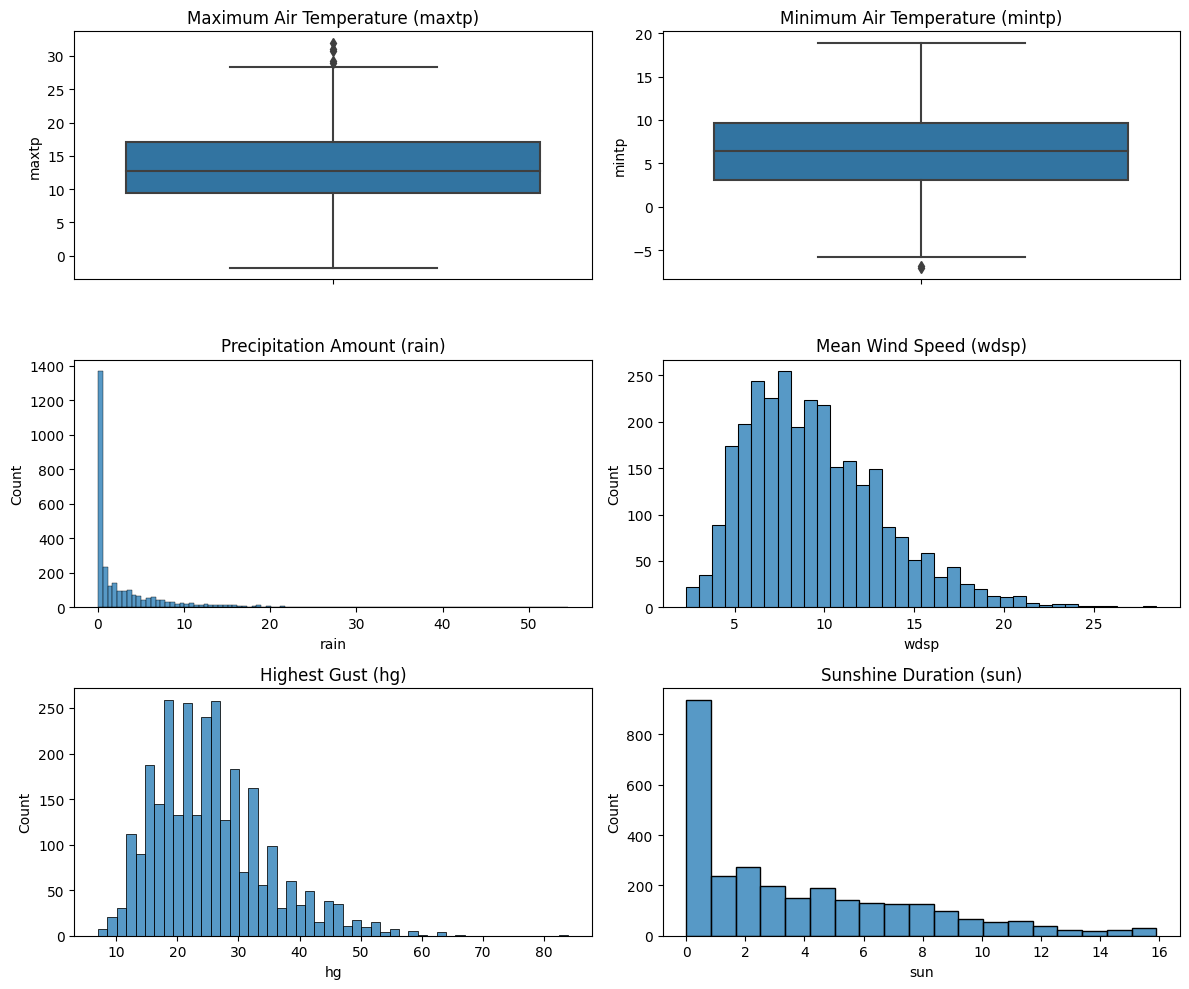

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots for multiple plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Plot for Maximum Air Temperature (maxtp)
sns.boxplot(data=df, y='maxtp', ax=axes[0, 0])
axes[0, 0].set_title('Maximum Air Temperature (maxtp)')

# Plot for Minimum Air Temperature (mintp)
sns.boxplot(data=df, y='mintp', ax=axes[0, 1])
axes[0, 1].set_title('Minimum Air Temperature (mintp)')

# Plot for Precipitation Amount (rain)
sns.histplot(data=df, x='rain', ax=axes[1, 0,])
axes[1, 0].set_title('Precipitation Amount (rain)')

# Plot for Mean Wind Speed (wdsp)
sns.histplot(data=df, x='wdsp', ax=axes[1, 1])
axes[1, 1].set_title('Mean Wind Speed (wdsp)')

# Plot for Highest Gust (hg)
sns.histplot(data=df, x='hg', ax=axes[2, 0])
axes[2, 0].set_title('Highest Gust (hg)')

# Plot for Sunshine Duration (sun)
sns.histplot(data=df, x='sun', ax=axes[2, 1])
axes[2, 1].set_title('Sunshine Duration (sun)')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


**Question 6: **Produce a scatter plot of the mean wind speed versus the highest gust and colour your points
based on month. Interpret your plot.

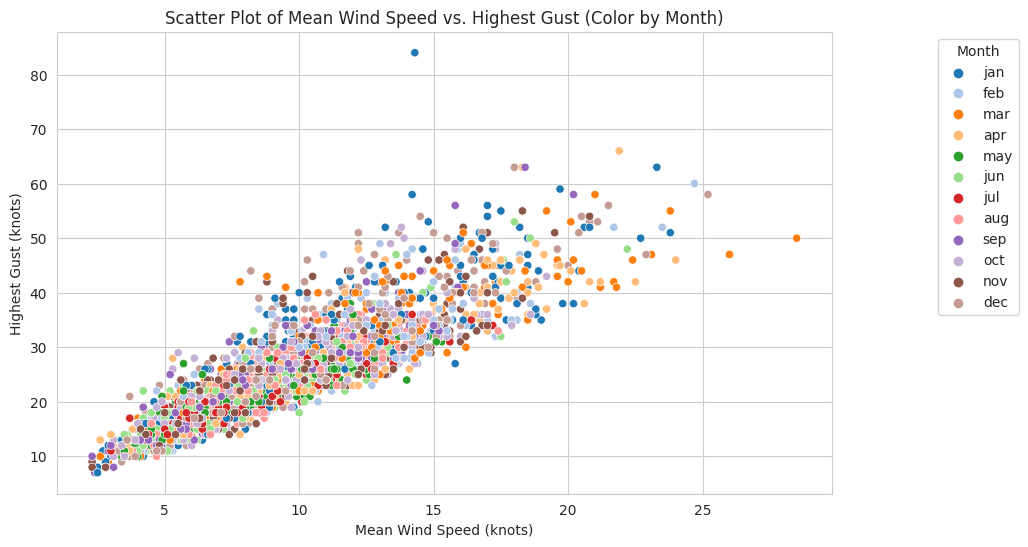

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set_style("whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="wdsp", y="hg", hue="month", palette="tab20")

# Add labels and title
plt.xlabel("Mean Wind Speed (knots)")
plt.ylabel("Highest Gust (knots)")
plt.title("Scatter Plot of Mean Wind Speed vs. Highest Gust (Color by Month)")

# Add a legend
plt.legend(title="Month", loc="upper right", bbox_to_anchor=(1.25, 1))

# Show the plot
plt.show()


**Question 7:** Compute the daily temperature range, and add this as an additional variable to your
DataFrame. Print out the last 10 rows of your DataFrame to show that the column has
been added correctly.

In [12]:
# Compute daily temperature range
df['temp_range'] = df['maxtp'] - df['mintp']

# Print the last 10 rows of the DataFrame to verify the new column
print(df.tail(10))


      day month  year        station  maxtp  mintp  rain  wdsp    hg  sun  \
2910   22   dec  2019  Knock Airport    7.0    2.7   4.8   8.0  20.0  3.1   
2911   23   dec  2019  Knock Airport    6.9    3.0   5.0  10.5  29.0  2.7   
2912   24   dec  2019  Knock Airport    6.6    3.1   0.7   8.4  24.0  2.9   
2913   25   dec  2019  Knock Airport    4.9    1.4   0.0   9.0  32.0  0.0   
2914   26   dec  2019  Knock Airport   10.0    4.8   6.2  12.2  34.0  0.0   
2915   27   dec  2019  Knock Airport   10.8    9.8   3.7  12.8  29.0  0.0   
2916   28   dec  2019  Knock Airport    9.8    7.9   0.0  14.8  30.0  0.0   
2917   29   dec  2019  Knock Airport   10.5    7.0   0.0  12.8  32.0  0.1   
2918   30   dec  2019  Knock Airport    9.6    3.4   NaN   8.4  21.0  0.0   
2919   31   dec  2019  Knock Airport    6.0    1.3   0.0   7.1  18.0  2.1   

      temp_range  
2910         4.3  
2911         3.9  
2912         3.5  
2913         3.5  
2914         5.2  
2915         1.0  
2916         1.9  


**Question 8:** Plot the daily temperature range versus the hours of sunlight per day, colouring the points
based on month. Interpret your plot.

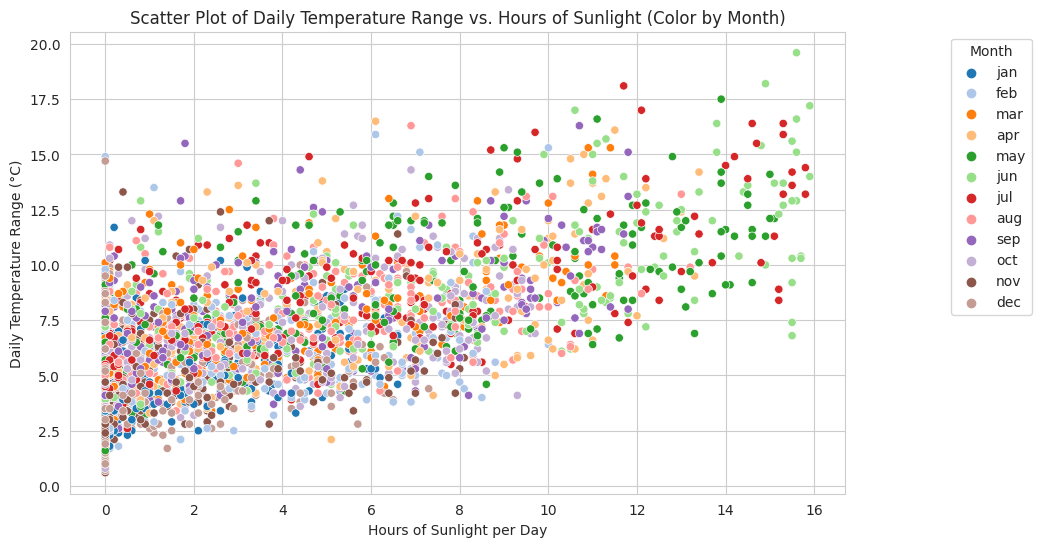

In [13]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="sun", y="temp_range", hue="month", palette="tab20")

# Add labels and title
plt.xlabel("Hours of Sunlight per Day")
plt.ylabel("Daily Temperature Range (°C)")
plt.title("Scatter Plot of Daily Temperature Range vs. Hours of Sunlight (Color by Month)")

# Add a legend
plt.legend(title="Month", loc="upper right", bbox_to_anchor=(1.25, 1))

# Show the plot
plt.show()

**Question 9:** Perform a comparative analysis of the weather at Dublin Airport, Shannon Airport and Cork
Airport.

In [15]:
# Calculate numerical summaries for each station
dublin_stats = df[df['station'] == 'Dublin Airport'].describe()
shannon_stats = df[df['station'] == 'Shannon Airport'].describe()
cork_stats = df[df['station'] == 'Cork Airport'].describe()

# Print the summaries
print("Numerical Summaries for Dublin Airport:")
print(dublin_stats)
print("\nNumerical Summaries for Shannon Airport:")
print(shannon_stats)
print("\nNumerical Summaries for Cork Airport:")
print(cork_stats)



Numerical Summaries for Dublin Airport:
              day         year       maxtp       mintp        rain  \
count  730.000000   730.000000  730.000000  730.000000  726.000000   
mean    15.720548  2018.500000   13.592603    5.724247    2.147383   
std      8.802278     0.500343    5.265505    4.488748    4.120571   
min      1.000000  2018.000000   -0.500000   -5.800000    0.000000   
25%      8.000000  2018.000000    9.500000    2.400000    0.000000   
50%     16.000000  2018.500000   13.000000    5.600000    0.200000   
75%     23.000000  2019.000000   17.875000    8.900000    2.300000   
max     31.000000  2019.000000   26.700000   17.800000   24.200000   

             wdsp          hg         sun  temp_range  
count  728.000000  728.000000  729.000000  730.000000  
mean     9.542720   24.943681    4.046091    7.868356  
std      3.829729    8.438033    3.952654    3.363322  
min      3.000000    9.000000    0.000000    1.000000  
25%      6.700000   19.000000    0.600000    5.50

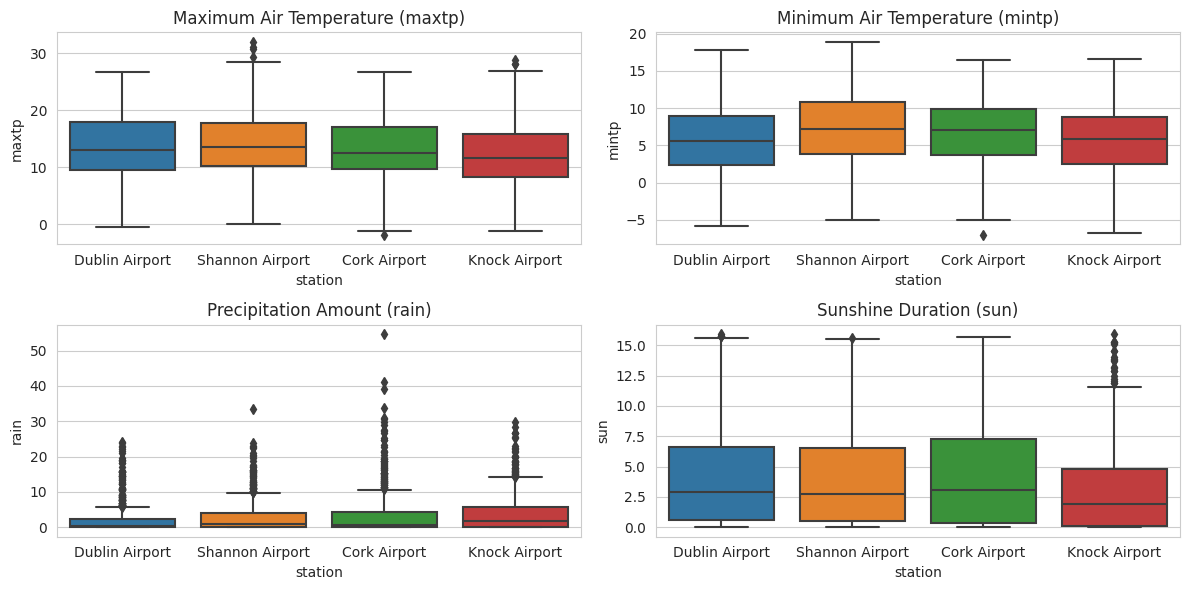

In [16]:
import matplotlib.pyplot as plt

# Create box plots for selected weather parameters
plt.figure(figsize=(12, 6))

# Maximum Air Temperature (maxtp)
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x="station", y="maxtp")
plt.title("Maximum Air Temperature (maxtp)")

# Minimum Air Temperature (mintp)
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x="station", y="mintp")
plt.title("Minimum Air Temperature (mintp)")

# Precipitation Amount (rain)
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x="station", y="rain")
plt.title("Precipitation Amount (rain)")

# Sunshine Duration (sun)
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x="station", y="sun")
plt.title("Sunshine Duration (sun)")

plt.tight_layout()

# Show the plots
plt.show()
